# Tímadæmi 4

In [2]:
#BYRJA -- Keyrið til að frumstilla numpy o.fl.
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)
%matplotlib inline
np.set_printoptions(precision=2, floatmode='fixed', suppress=True)

In [3]:
%%javascript 
MathJax.Hub.Config({TeX: {equationNumbers:{autoNumber:"AMS"}, TagSide:"left"}});

<IPython.core.display.Javascript object>

Hægt er að skilgreina föll af vigrum og föll af mörgum breytistærðum í stærðfræði. Í lið 2.4 í Fyrirlestraræfingu 4b sáum við dæmi um þetta:

\begin{equation} \label{e1}
S(a,b) = \sum_{i=1}^{50}(ax_i + b - y_i)^2
\end{equation}

Við sjáum við að S er ekki bara fall af $a$ og $b$, heldur líka fall af vigrunum $x$ og $y$, og auk þess kemur við sögu talan 50 sem í almennri framsetning ætti að heita $n$. Því má skrifa:

\begin{equation} \label{e2}
d(a,b,x,y) = \sum_{i=1}^{n}(ax_i + b - y_i)^2
\end{equation}

og svo látum við fylgja að $d$ sé fall $\Bbb R\times\Bbb R\times\Bbb R^n\times\Bbb R^n\rightarrow\Bbb R$.
Fyrir gefin $x$ og $y$ af lengd 50 má svo skilgreina, sbr. jöfnu ($\ref{e1}$):

\begin{equation} \label{e3}
S(a,b) = d(a,b,x,y) 
\end{equation}

### 1. Föll til að búa til slembigögn og reikna kvaðratsummu frávika

Í þessu dæmi er best að allir fái sömu slembitölur. Til að tryggja það, skrifið efst í reit #1: `npr.seed(10)`.
Skrifið svo (í sama reit) Python-fall `slembixy(n)` sem skilar tveimur háðum (*korrelleruðum*) slembivigrum af lengd
`n`: `x` (tölur á bilinu $[1, 6]$) og `y` (reiknaðan með $y = 1.5 x + 0.3 + \varepsilon$), 
með því að nota formúlurnar úr reit #PLÖNTUR í F4b:

        x = 1 + 5*npr.random(n)
        e = 0.7*npr.normal(size=n)
        y = 1.5*x + 0.3 + e
        
Skrifið í framhaldi Python-fall til að reikna $d$. Eftir að fallið d hefur verið skilgreint látið `n = 50` og
kallið svo á `slembixy` til að gefa `x` og `y` gildi (x ætti að byrja á [4.86, 1.10...] og y á [7.02, 1.81...])

In [4]:
#1
npr.seed(10)
def slembixy(n):
    x = 1 + 5*npr.random(n)
    e = 0.7*npr.normal(size=n)
    y = 1.5*x + 0.3 + e
    return x, y

def d(a,b,x,y):
    n = len(x)
    s = 0
    for i in range(n):
        s += ( a*x[i] + b - y[i] )**2
    #print(f'S = {s:.2f}')
    return s

def dd(a,b,x,y):
    n = len(x)
    r = a*x + b - y
    rr = np.sum(r**2)
    return rr
    
n = 50
x, y = slembixy(n)
print(x)
print(y)

[4.86 1.10 4.17 4.74 3.49 2.12 1.99 4.80 1.85 1.44 4.43 5.77 1.02 3.56
 5.06 4.06 4.61 2.46 5.59 4.57 3.71 1.71 2.87 4.37 3.21 3.17 4.09 3.57
 4.25 4.01 5.03 3.61 5.54 2.60 1.45 2.50 1.57 5.14 1.23 4.13 3.74 5.10
 1.99 5.28 2.76 4.77 2.48 5.42 2.63 1.83]
[7.02 1.81 6.31 7.63 5.93 3.38 3.27 7.71 2.69 2.96 7.53 9.09 3.51 6.28
 7.82 6.14 7.05 3.64 9.47 6.67 5.81 2.50 5.33 5.86 4.86 4.97 6.66 5.97
 6.53 7.00 8.06 7.44 7.56 4.63 1.75 3.50 4.04 9.24 0.85 6.34 5.86 6.45
 3.26 8.50 4.59 6.06 4.80 8.60 4.20 2.51]


### 2. Jafna bestu línu og skilgreining S   
   
Farið nú í reit #2. Finnið jöfnu bestu línu, $y = Ax + B$ eins og í F4b með `(A,B) = polyfit(x,y,1)`. 
Það ætti að gefa A = 1.46 og B = 0.47. Búið næst til fall sem reiknar S. Prófið að prenta út `S(A,B)`, 
`S(1.5, 0.3)` og `S(2,1)` (ætti að gefa 23.42, 23.61 og 344.93). 

In [5]:
#2
npr.seed(10)
(x,y) = slembixy(50)
(A,B) = np.polyfit(x,y,1)
print(f'A = {A:.2f}')
print(f'B = {B:.2f}')

def S(a,b):
    n = len(x)
    s = 0
    for i in range(n):
        s += ( a*x[i] + b - y[i] )**2
    return s

S(A,B)
S(1.5,0.3)
S(2,1);

A = 1.46
B = 0.47


### 3. Þversnið af S
Næst skal búa til föll sem gefa þversnið af S, annarsvegar $f(b) = S(1.5, b)$ og hinsvegar $g(a) = S(a, 1.5)$, og síðan teikna gröf þeirra eins og gert var í F4b. Teiknið $f$ á bilinu $[-1,2]$ í reit **#3a** og $g$ á bilinu $[1,3]$ í reit **#3b**. 

***Leiðbeining*** *Þægilegt er að nota "comprehension" (yfirgrip) til að reikna vigra með gildum $f$ og $g$, t.d. fyrir $f$:*

        t = np.linspace(-1,2)
        ft = np.array([f(b) for b in t])

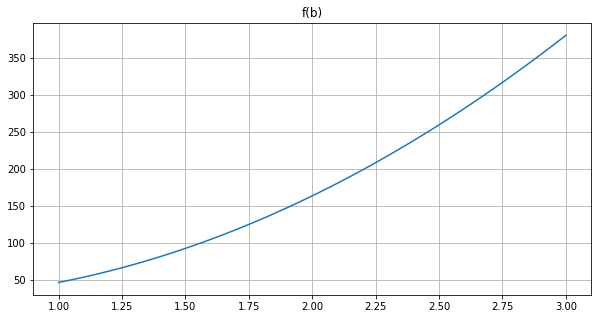

In [6]:
#3a
def f(b):
    return S(1.5,b)
def g(a):
    return S(a,1.5)

plt.figure(figsize=(10,5))
t = np.linspace(1,3)
ft = np.array([f(b) for b in t])
plt.plot(t, ft);
plt.grid()
plt.title('f(b)');

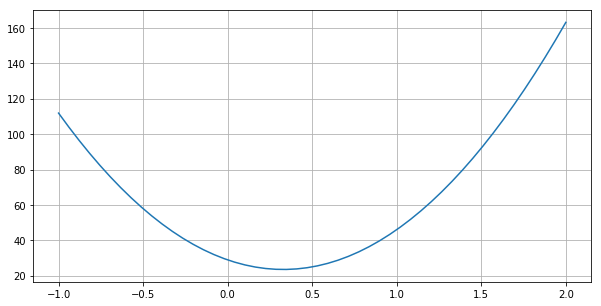

In [7]:
#3b
def g(a):
    return S(a,1.5)

plt.figure(figsize=(10,5))
t = np.linspace(-1,2)
ft = np.array([f(b) for b in t])
plt.plot(t, ft);
plt.grid()

### 4. Jafnhæðarlínur S
Nú skal teikna jafnhæðarlínur fallsins S á rétthyrningnum $1 \leq a \leq 2, -1 \leq b \leq 2$. 
Til þess er kallað á `plt.contour(u, v, Z.T, m)` þar sem `u` er vigur með punktum á a-ás (þ.e. x-ás, t.d. `np.linspace(1,2)`), 
`v` er vigur með punktum á b-ás (y-ás, `linspace(-1,2)`), `Z` er fylki með $z_{ij} = S(u_i, v_j)$ og `m` er fjöldi hæðarlína sem teiknaðar eru, hér er hæfilegt að nota `m = 40`.

***Leiðbeining*** *Ágætt er að setja lengdir `u` og `v` í breytur `nu` og `nv` og núllstilla Z með `nu` $\times$ `nv` núllfylki (munið að ``np.zeros`` tekur inn par svo það þarf tvöfalda sviga). Svo þarf tvöfalda lykkju fyrir i í `range(nu)` og `j` í `range(nv)` til að reikna öll stökin í Z.*

[1.00 1.02 1.04 1.06 1.08 1.10 1.12 1.14 1.16 1.18 1.20 1.22 1.24 1.27
 1.29 1.31 1.33 1.35 1.37 1.39 1.41 1.43 1.45 1.47 1.49 1.51 1.53 1.55
 1.57 1.59 1.61 1.63 1.65 1.67 1.69 1.71 1.73 1.76 1.78 1.80 1.82 1.84
 1.86 1.88 1.90 1.92 1.94 1.96 1.98 2.00]


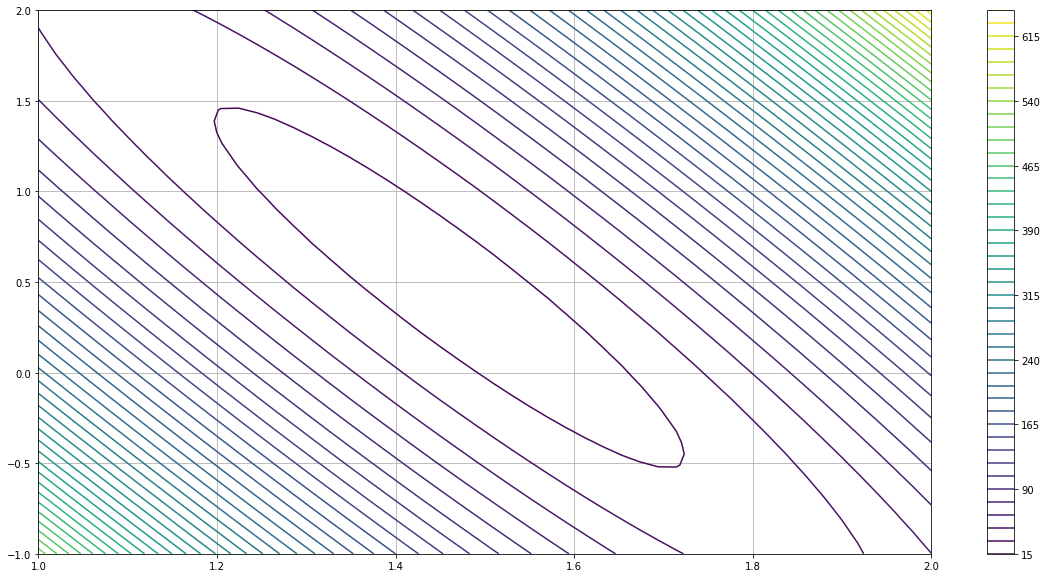

In [18]:
#4
u = np.linspace(1,2)
v = np.linspace(-1,2)
nu = len(u)
nv = len(v)
m = 40
z = np.zeros((nu,nv))
for i in range(nu):
    for j in range(nv):
        z[i][j] = S(u[i],v[j])
plt.figure(figsize=(20,10))
plt.contour(u,v,z.T,m)
plt.grid()
plt.colorbar();